# Exploratory data analysis with employeedata

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [51]:
df = pd.read_csv('/Users/kaiyang/Desktop/employeedata.csv')
df.head() 

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0


## Basic data set Exploration

### 1. Shape (dimensions) of the DataFrame

#### The .shape attribute of a Pandas DataFrame gives an overall structure of the data. It returns a tuple of length 2 that translates to how many rows of observations and columns the dataset has.

In [52]:
df.shape

(474, 10)

#### We can see that the dataset has 474 observations and 10 features.

### 2. Data types of the various columns

#### The DataFrame’s .dtypes attribute displays the data types of the columns as a Panda’s Series (Series means a column of values and their indices).

In [53]:
df.dtypes

id           int64
gender      object
bdate       object
educ         int64
jobcat       int64
salary       int64
salbegin     int64
jobtime      int64
prevexp      int64
minority     int64
dtype: object

#### We observe that our dataset has a combination of categorical (object) and numeric (int) features. At this point, I went back to the dataset intro page for an understanding of the columns and their meanings.

### 3. Display a few rows

#### The Pandas DataFrame has very handy functions for displaying a few observations. data.head()displays the first 5 observations, data.tail() the last 5, and data.sample() an observation chosen randomly from the dataset. You can display 5 random observations using data.sample(5)

In [54]:
df.head()  # Displaying the first 5 rows (by default)

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0


In [55]:
df.tail()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
469,470,m,1/22/1964,12,1,26250,15750,64,69,1
470,471,m,8/3/1966,15,1,26400,15750,64,32,1
471,472,m,2/21/1966,15,1,39150,15750,63,46,0
472,473,f,11/25/1937,12,1,21450,12750,63,139,0
473,474,f,11/5/1968,12,1,29400,14250,63,9,0


In [56]:
df.sample(5)

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
161,162,m,5/25/1961,16,3,45625,23250,86,60,0
380,381,m,7/15/1946,17,1,27000,18000,70,192,1
10,11,f,2/7/1950,16,1,30300,16500,98,143,0
348,349,f,3/22/1938,17,1,29100,12750,73,375,0
140,141,f,6/14/1966,15,1,35550,13350,88,32,0


### Distribution

#### This refers to how the values in a feature are distributed, or how often they occur. For numeric features, we’ll see how many times groups of numbers appear in a particular column, and for categorical features, the classes for each column and their frequency. We will use both graphs and actual summary statistics. The graphs enable us to get an overall idea of the distributions while the statistics give us factual numbers. These two strategies are both recommended as they complement each other.

### Numeric Features

### 4. Plot each numeric feature

#### We will use Pandas histogram. A histogram groups numbers into ranges (or bins) and the height of a bar shows how many numbers fall in that range. df.hist() plots a histogram of the data’s numeric features in a grid. We will also provide the figsize and xrot arguments to increase the grid size and rotate the x-axis by 45 degrees.

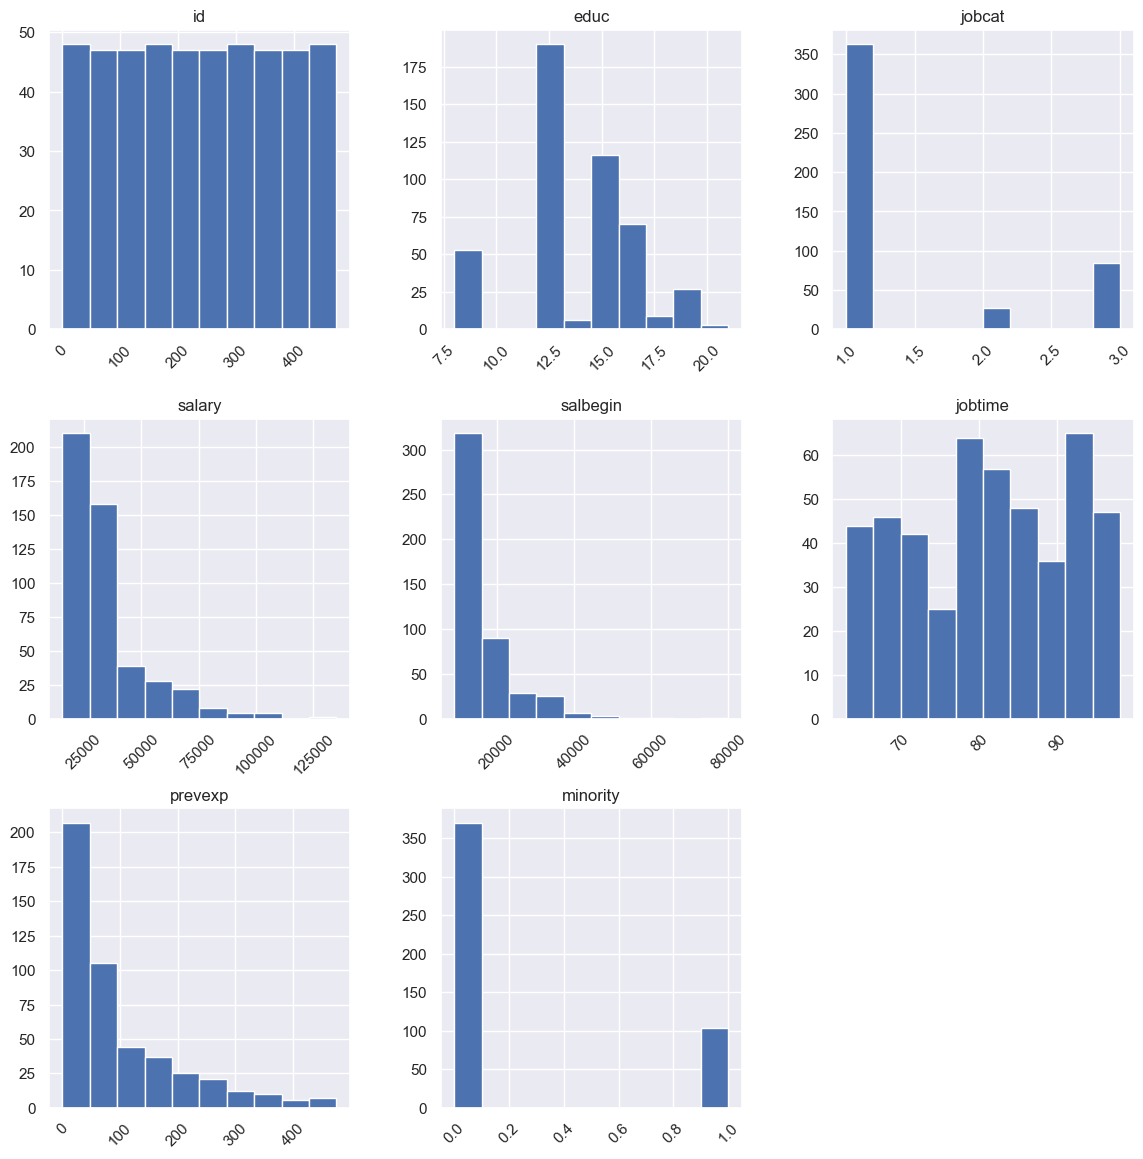

In [57]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

### 5. Summary statistics of the numerical features

#### Now that we have an intuitive feel of the numeric features, we will look at actual statistics using df.describe()which displays their summary statistics.

In [58]:
df.describe()

,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,237.500000,13.491561,1.411392,34419.567511,17016.086498,81.109705,95.860759,0.219409
std,136.976275,2.884846,0.773201,17075.661465,7870.638154,10.060945,104.586236,0.414284
min,1.000000,8.000000,1.000000,15750.000000,9000.000000,63.000000,0.000000,0.000000
25%,119.250000,12.000000,1.000000,24000.000000,12487.500000,72.000000,19.250000,0.000000
50%,237.500000,12.000000,1.000000,28875.000000,15000.000000,81.000000,55.000000,0.000000
75%,355.750000,15.000000,1.000000,36937.500000,17490.000000,90.000000,138.750000,0.000000
max,474.000000,21.000000,3.000000,135000.000000,79980.000000,98.000000,476.000000,1.000000


#### We can see for each numeric feature, the count of values in it, the mean value, std or standard deviation, minimum value, the 25th percentile, the 50th percentile or median, the 75th percentile, and the maximum value.

### Categorical features

### 6. Summary statistics of the categorical features

#### For categorical features, it is important to show the summary statistics before we plot graphs because some features have a lot of unique classes. To check the summary statistics of only the categorical features, we will use df.describe(include=’object’)

In [59]:
df.describe(include='object')

,gender,bdate
count,474,474
unique,2,462
top,m,7/18/1962
freq,258,2


#### This table is a bit different from the one for numeric features. Here, we get the count of the values of each feature, the number of unique classes, the top most frequent class, and how frequently that class occurs in the data set.

### 7. Plot each categorical feature

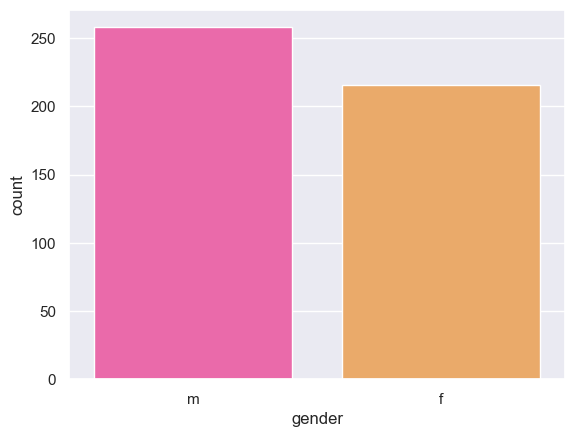

In [60]:
# Single categorical variable
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", hue="gender", data=df,palette="spring")
plt.show()

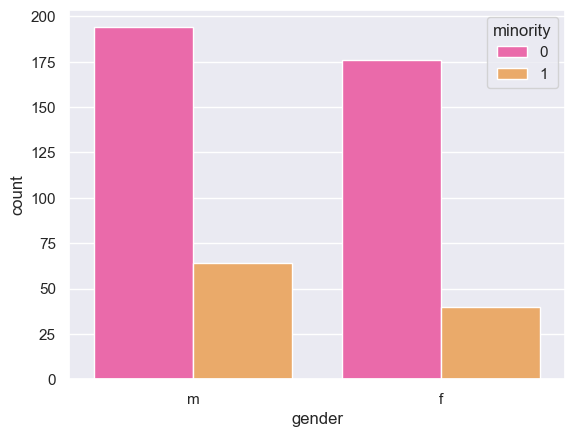

In [61]:
# Two categorical variables
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", hue="minority", data=df,palette="spring")
plt.show()

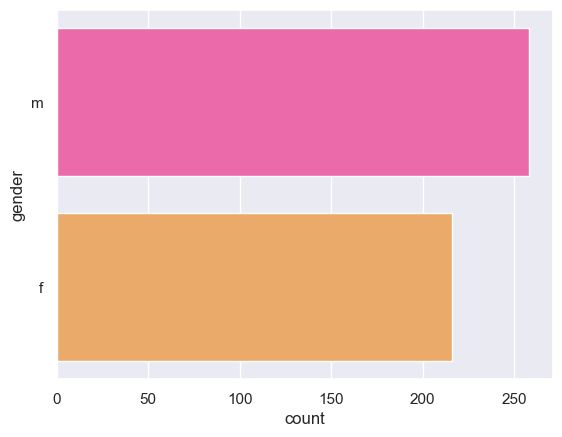

In [62]:
# change to horizontal countplot
sns.set_theme(style="darkgrid")
sns.countplot(y="gender", hue="gender", data=df, palette="spring")
plt.show()

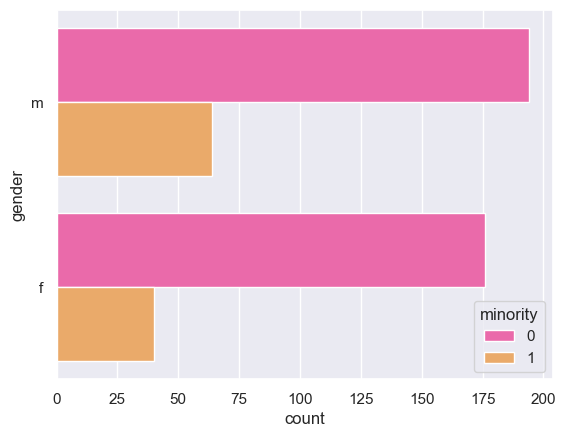

In [63]:
sns.set_theme(style="darkgrid")
sns.countplot(y="gender", hue="minority", data=df, palette="spring")
plt.show()

### Grouping and segmentation

#### Segmentation allows us to cut the data and observe the relationship between categorical and numeric features.

### 8. Segment the target variable by categorical features.

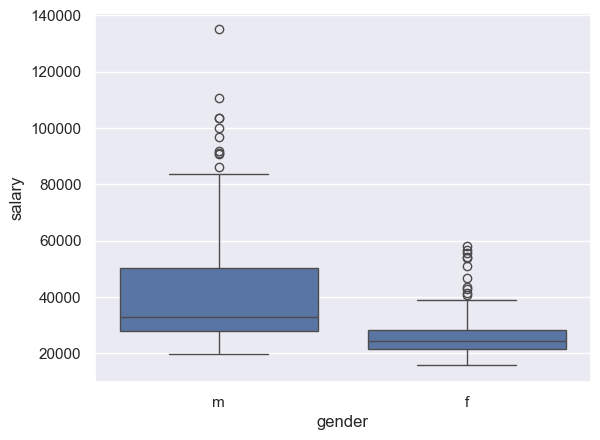

In [64]:
sns.boxplot(x= "gender", y="salary", data=df)
plt.show()

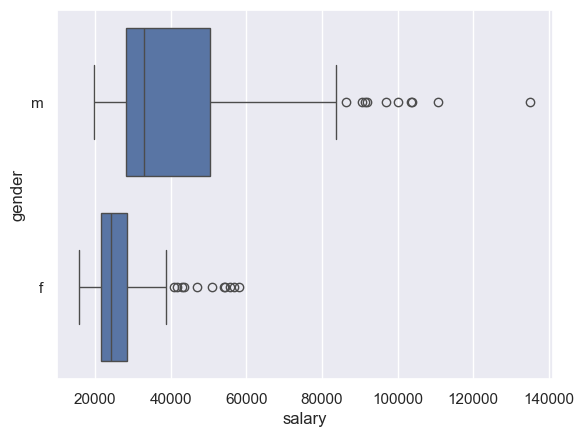

In [65]:
sns.boxplot(y= "gender", x="salary", data=df)
plt.show()

### 9. Group numeric features by each categorical feature

#### Here we will see how all the other numeric features, not just salary, change with each categorical feature by summarizing the numeric features across the gender (classes). We use the Dataframe’s groupby function to group the data by a category and calculate a metric (such as mean, median, min, std, etc) across the various numeric features.

In [66]:
display(df.groupby("gender")['salary'].mean())

gender
f    26031.921296
m    41441.782946
Name: salary, dtype: float64

In [67]:
display(df.groupby("gender")[["id",	"educ",	"jobcat", "salary", "salbegin", "jobtime", "prevexp", "minority"]].mean())

,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
gender,,,,,,,,
f,249.384259,12.370370,1.092593,26031.921296,13091.967593,80.37963,77.037037,0.185185
m,227.550388,14.430233,1.678295,41441.782946,20301.395349,81.72093,111.620155,0.248062


In [76]:
df_without_bdate = df.drop(columns=['bdate','id'])

display(df_without_bdate.groupby("gender").mean())

# this code aims to caculate the means of all the columns in the dataset. it returns an error because in the dataset, there is a column called "bdate" which is a date column, not a numerical value. so we need to exclude this column.   


,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
gender,,,,,,,
f,12.370370,1.092593,26031.921296,13091.967593,80.37963,77.037037,0.185185
m,14.430233,1.678295,41441.782946,20301.395349,81.72093,111.620155,0.248062


### Relationships between numeric features and other numeric features

### 10. Correlations matrix for the different numerical features

#### A correlation is a value between -1 and 1 that amounts to how closely values of two separate features move simultaneously. A positive correlation means that as one feature increases the other one also increases, while a negative correlation means one feature increases as the other decreases. Correlations close to 0 indicate a weak relationship while closer to -1 or 1 signifies a strong relationship.

#### We will use df.corr() to calculate the correlations between the numeric features and it returns a DataFrame.

In [77]:
df_without_bdate['gender'] = np.where(df_without_bdate['gender'] == "f", 1, 0)
df_without_bdate.head()


,gender,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,0,15,3,57000,27000,98,144,0
1,0,16,1,40200,18750,98,36,0
2,1,12,1,21450,12000,98,381,0
3,1,8,1,21900,13200,98,190,0
4,0,15,1,45000,21000,98,138,0


In [90]:

cormat = df_without_bdate.corr()
round(cormat, 2)

,gender,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
gender,1.00,-0.36,-0.38,-0.45,-0.46,-0.07,-0.16,-0.08
educ,-0.36,1.00,0.51,0.66,0.63,0.05,-0.25,-0.13
jobcat,-0.38,0.51,1.00,0.78,0.75,0.01,0.06,-0.14
salary,-0.45,0.66,0.78,1.00,0.88,0.08,-0.10,-0.18
salbegin,-0.46,0.63,0.75,0.88,1.00,-0.02,0.05,-0.16
jobtime,-0.07,0.05,0.01,0.08,-0.02,1.00,0.00,0.05
prevexp,-0.16,-0.25,0.06,-0.10,0.05,0.00,1.00,0.14
minority,-0.08,-0.13,-0.14,-0.18,-0.16,0.05,0.14,1.00


#### This might not mean much now, so let us plot a heatmap to visualize the correlations.

### 11. Heatmap of the correlations

#### We will use a Seaborn heatmap to plot the grid as a rectangular color-coded matrix. We use sns.heatmap(corrs, cmap=’RdBu_r’,annot=True).

#### The cmap=‘RdBu_r’ argument tells the heatmap what colour palette to use. A high positive correlation appears as dark red and a high negative correlation as dark blue. Closer to white signifies a weak relationship. annot=True includes the values of the correlations in the boxes for easier reading and interpretation.

#### We look out for strongly correlated features: either dark red (positive) or dark blue (negative).

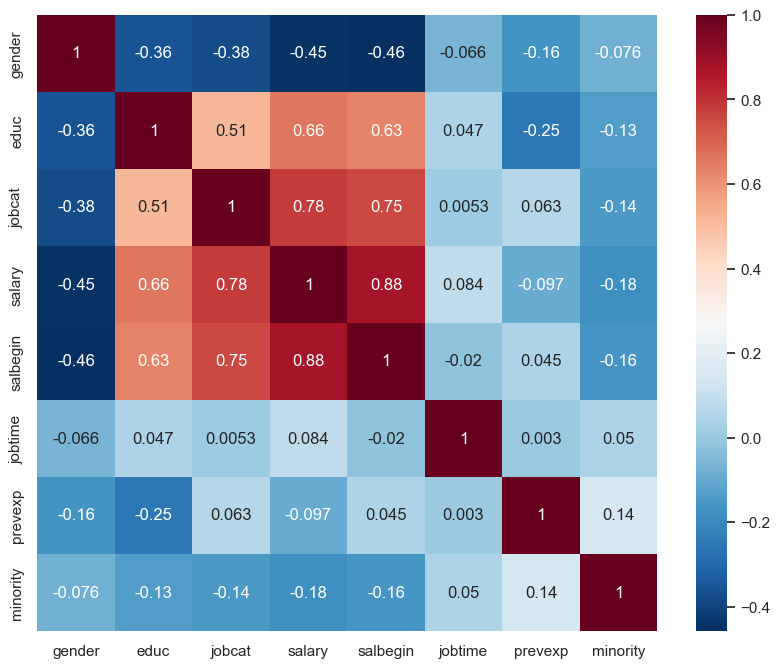

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(cormat , cmap='RdBu_r', annot=True);
plt.show()

#### For more information, see: "11 Essential Code Blocks for Complete EDA (Exploratory Data Analysis)-Regression Task": https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd.

## The end, see you next week!